# Problem Statement

Uber is a taxi service provider as we know, we need to predict the 
**high booking area** using an **Unsupervised algorithm** and 

**price** for the location using a **supervised algorithm** and 

use some map function to display the data


Dataset : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

# Required Libraries

In [539]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
import pacmap

ModuleNotFoundError: No module named 'pacmap'

# Data Ingestion

In [502]:
file_path = "rideshare_kaggle.csv"
df = pd.read_csv(file_path)

In [503]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [506]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

# EDA & FE

## Basic Informations

In [403]:
print(f"Dataset has {df.shape[0]} Rows and {df.shape[1]} Columns.")

Dataset has 693071 Rows and 57 Columns.


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Handling Missing Value 

In [405]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [406]:
missing = pd.DataFrame({ "NA %":df.isna().sum()/df.shape[0]*100 }, )

missing.sort_values(by="NA %", ascending=False, inplace=True)

missing.head()

,NA %
price,7.949402
id,0.000000
ozone,0.000000
temperatureLowTime,0.000000
apparentTemperatureHigh,0.000000


**Price column has considerable number of missing values.**

In [407]:
# Dropping NA values

df.dropna(inplace=True)

Again checking for NA values for confirmation

In [408]:
missing = pd.DataFrame({ "NA %":df.isna().sum()/df.shape[0]*100 }, )

missing.sort_values(by="NA %", ascending=False, inplace=True)

missing.head()

,NA %
id,0.0
temperatureHighTime,0.0
temperatureLowTime,0.0
apparentTemperatureHigh,0.0
apparentTemperatureHighTime,0.0


## Handeling Null values

In [409]:
null_cols = df.columns[df.isnull().any()].to_list()

print(f"No of columns containing Null values = {len(null_cols)}")

if len(null_cols):
    print(null_cols)

No of columns containing Null values = 0


## Numeric and Categorical columns

In [410]:
num_col = df.select_dtypes(['float64', 'int64']).columns
num_col

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [411]:
cat_col = df.select_dtypes(['object', 'category']).columns
cat_col

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

## Analysing Categorical Columns

In [412]:
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### Unique Values in each categorical columns

In [413]:
for col in cat_col:
    print(f"Column Name : {col}\nUnique Values : {df[col].unique()}\n{'*'*50}")

Column Name : id
Unique Values : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
**************************************************
Column Name : datetime
Unique Values : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']
**************************************************
Column Name : timezone
Unique Values : ['America/New_York']
**************************************************
Column Name : source
Unique Values : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
**************************************************
Column Name : destination
Unique Values : ['N

**Observations:**

1. 'timezone' column has only one value throughout the dataset. We must drop it.
2. 'id' , 'product_id' columns have no replation with price prrediction. It can also be dropped.
3. there are seperate 'day', 'month', 'year' columns. so 'datetime' column has no use and can be dropped.
4. 'short_summary' and 'long_summary' can also be dropped.
5. remaining all the columns contain non-ordinal variables and must be encoded using **OneHotEncoding**.
6. After eencoding, we will keep only those columns having good corelation with the 'price' column.

### Removing unnecessary columns on the basis of above observations

In [414]:
df.drop(columns=['id', 'datetime', 'timezone', 'product_id', 'short_summary', 'long_summary'], inplace=True)

In [415]:
cat_col = df.select_dtypes(['object', 'category']).columns.to_list()
print(f"Remaining categorical columns : {cat_col}")

Remaining categorical columns : ['source', 'destination', 'cab_type', 'name', 'icon']


### Applying OHE on remaining Categorical columns

In [416]:
#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    print(f"Applying OHE on {col} :\n")
    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Fit and transform the data
    encoded_data = encoder.fit_transform(df[[col]])

    # Convert the encoded data to a DataFrame
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names())

    # Calculate the correlation with the "price" column
    correlation = encoded_df.corrwith(df['price'])

    # Define the correlation threshold for feature selection
    correlation_threshold = 0.001

    # Eleminating columns with corelation < threshold
    removed = correlation[correlation.abs() < correlation_threshold]
    correlation = correlation[correlation.abs() >= correlation_threshold]

    # Iterate over each categorical column
    encoded_dfs = []
    selected_features = []

    if correlation.count() > 0:
        # If the maximum correlation is above the threshold, select the top features
        df = pd.concat([df,encoded_df[correlation.index]], axis=1)
        print(f"Based on correlation with price column kept following features : \n{correlation}")

    else:
        print(f"No columns found with corellation with price column grater than {correlation_threshold}")

    print(f"Following Categorical variables are removed : \n{removed}")

    print('*'*50, '\n')

Applying OHE on source :



c:\Users\USER\anaconda3\envs\assessment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Based on correlation with price column kept following features : 
x0_Financial District   -0.001170
x0_North Station        -0.001251
dtype: float64
Following Categorical variables are removed : 
x0_Back Bay                   0.000053
x0_Beacon Hill                0.000691
x0_Boston University          0.000674
x0_Fenway                     0.000805
x0_Haymarket Square           0.000411
x0_North End                 -0.000217
x0_Northeastern University    0.000458
x0_South Station             -0.000794
x0_Theatre District           0.000512
x0_West End                  -0.000167
dtype: float64
************************************************** 

Applying OHE on destination :



c:\Users\USER\anaconda3\envs\assessment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Based on correlation with price column kept following features : 
x0_Back Bay                  -0.010804
x0_Beacon Hill               -0.008678
x0_Boston University          0.071020
x0_Fenway                     0.047591
x0_Financial District         0.045689
x0_Haymarket Square          -0.068062
x0_North End                 -0.046038
x0_North Station              0.007619
x0_Northeastern University    0.038164
x0_South Station             -0.051447
x0_Theatre District          -0.016503
x0_West End                  -0.008950
dtype: float64
Following Categorical variables are removed : 
Series([], dtype: float64)
************************************************** 

Applying OHE on cab_type :



c:\Users\USER\anaconda3\envs\assessment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Based on correlation with price column kept following features : 
x0_Lyft    0.082832
x0_Uber   -0.082832
dtype: float64
Following Categorical variables are removed : 
Series([], dtype: float64)
************************************************** 

Applying OHE on name :



c:\Users\USER\anaconda3\envs\assessment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Based on correlation with price column kept following features : 
x0_Black           0.131133
x0_Black SUV       0.452894
x0_Lux             0.038836
x0_Lux Black       0.206441
x0_Lux Black XL    0.499843
x0_Lyft           -0.219664
x0_Lyft XL        -0.039146
x0_Shared         -0.333118
x0_UberPool       -0.256775
x0_UberX          -0.223423
x0_UberXL         -0.028602
x0_WAV            -0.223441
dtype: float64
Following Categorical variables are removed : 
Series([], dtype: float64)
************************************************** 

Applying OHE on icon :



c:\Users\USER\anaconda3\envs\assessment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Based on correlation with price column kept following features : 
x0_ clear-night            -0.002350
x0_ partly-cloudy-day       0.001169
x0_ partly-cloudy-night     0.001946
dtype: float64
Following Categorical variables are removed : 
x0_ clear-day    -0.000668
x0_ cloudy       -0.000731
x0_ fog          -0.000052
x0_ rain         -0.000321
dtype: float64
************************************************** 



In [417]:
# Removing the categorical columns
df.drop(columns=cat_col, axis=1, inplace=True)

In [418]:
df.shape

(693070, 77)

## Analysing Numerical Columns

In [419]:
df.isna().sum()

timestamp                   55094
hour                        55094
day                         55094
month                       55094
price                       55094
                            ...  
x0_UberXL                      31
x0_WAV                         31
x0_ clear-night                 3
x0_ partly-cloudy-day           3
x0_ partly-cloudy-night         3
Length: 77, dtype: int64

In [420]:
len(num_col)

46

In [421]:
num_df = df[num_col]

In [422]:
num_df.shape

(693070, 46)

In [423]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


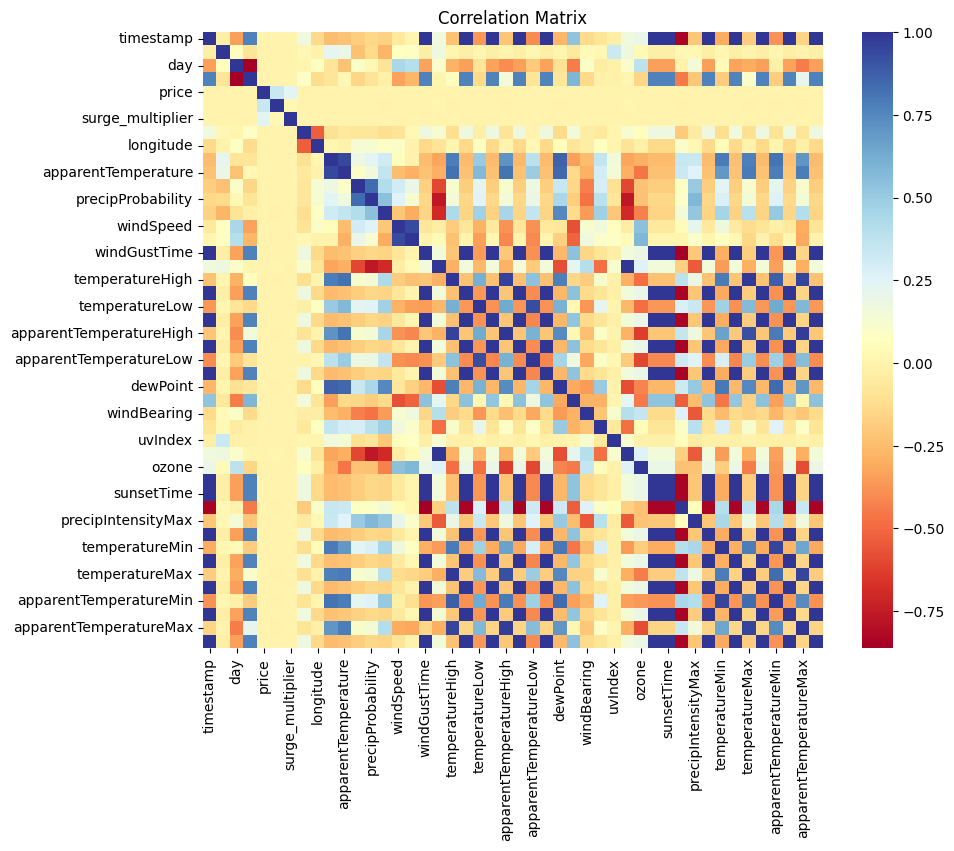

In [424]:
corr = num_df.corr()

# Plot the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()


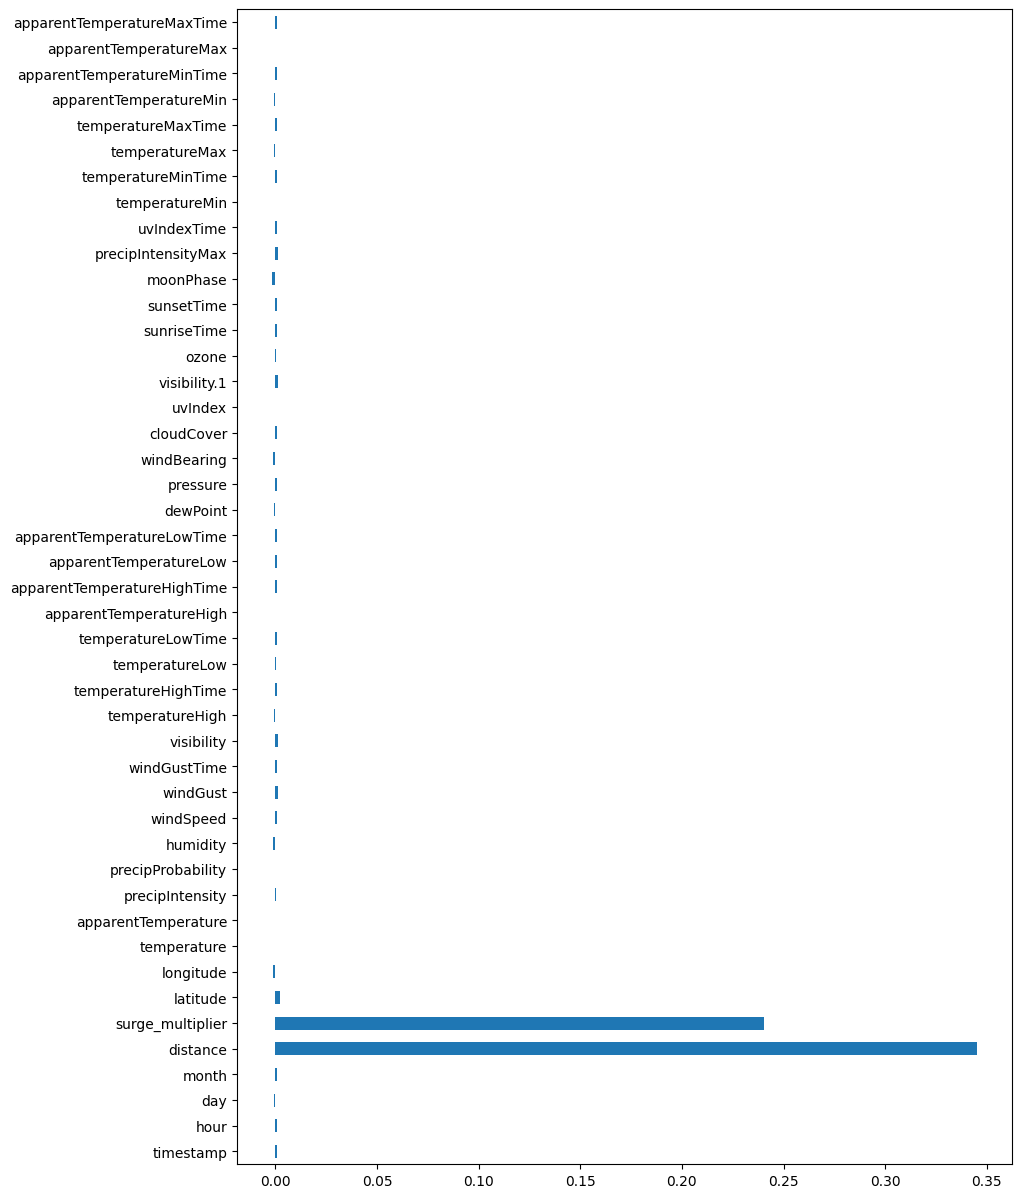

In [425]:
corr = num_df.drop(columns=['price']).corrwith(num_df['price'])


plt.figure(figsize=(10,15))
corr.plot(kind='barh')
plt.show()

### Date-time reelated Numerical columns

In [426]:
num_col

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

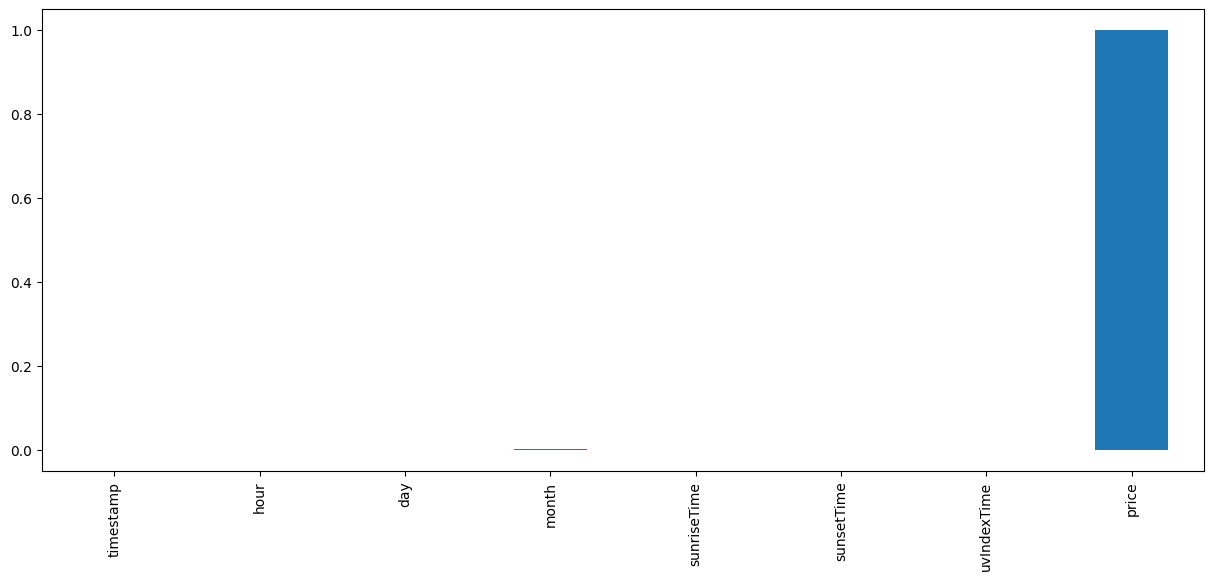

In [427]:
datetime_col = ['timestamp', 'hour', 'day', 'month', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'price']

datetime_df = df[datetime_col]

datetime_corr = datetime_df.corrwith(df['price'])

plt.figure(figsize=(15,6))
datetime_corr.plot(kind='bar')
plt.xlabel="Datetime related features"
plt.ylabel="Correlation"
plt.show()

**Observations:**

1. All the datetime related features has very low correlations with the price features.
2. We can drop all the datetime related features.

In [428]:
datetime_col.remove('price')
datetime_col

['timestamp',
 'hour',
 'day',
 'month',
 'sunriseTime',
 'sunsetTime',
 'uvIndexTime']

In [429]:
# removing all the datetime related features
df.drop(columns=datetime_col, inplace=True)

In [430]:
df.shape

(693070, 70)

### Temperature related Numerical features

In [431]:
temp_col = ['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime']

In [432]:
temp_df = df[temp_col+['price']]

temp_df.head()

,temperature,apparentTemperature,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
0,42.34,37.12,43.68,1.544969e+09,34.19,1.545048e+09,37.95,1.544969e+09,27.39,1.545044e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09,5.0
1,43.58,37.35,47.30,1.543252e+09,42.10,1.543298e+09,43.92,1.543252e+09,36.20,1.543291e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09,11.0
2,38.33,32.93,47.55,1.543320e+09,33.10,1.543403e+09,44.12,1.543320e+09,29.11,1.543392e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09,7.0
3,34.38,29.63,45.03,1.543511e+09,28.90,1.543579e+09,38.53,1.543511e+09,26.20,1.543576e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09,26.0
4,37.44,30.88,42.18,1.543421e+09,36.71,1.543478e+09,35.75,1.543421e+09,30.29,1.543460e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09,9.0


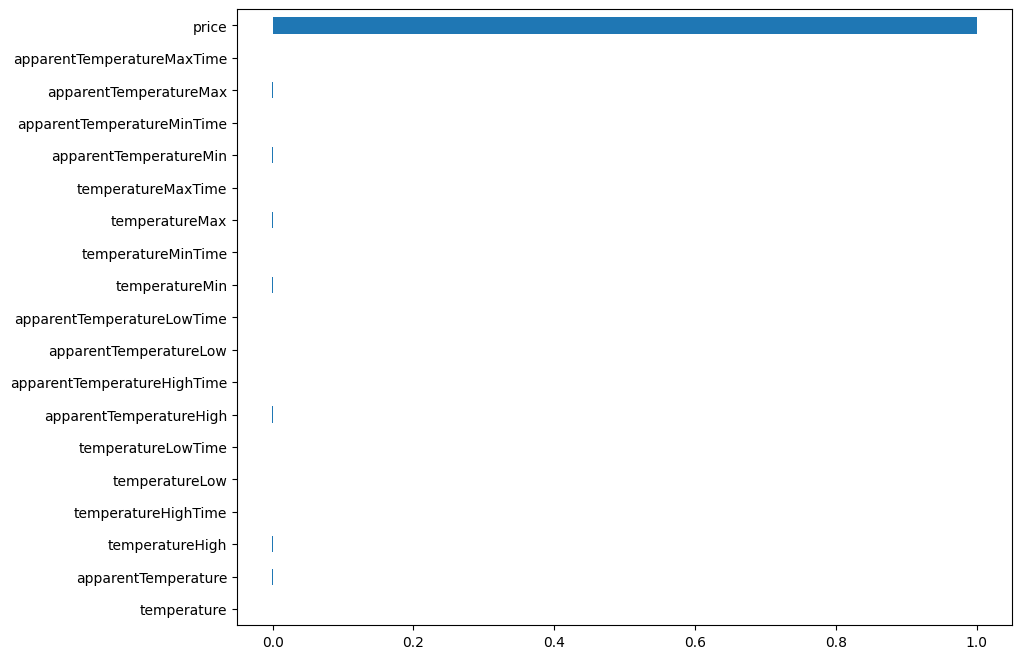

In [433]:
temp_corr = temp_df.corrwith(df['price'])

plt.figure(figsize=(10,8))
temp_corr.plot(kind='barh')
plt.ylabel="Temperature related features"
plt.xlabel="Correlation"
plt.show()

In [434]:
temp_corr.round(3)

temperature                   -0.000
apparentTemperature           -0.000
temperatureHigh               -0.001
temperatureHighTime            0.001
temperatureLow                 0.000
temperatureLowTime             0.001
apparentTemperatureHigh       -0.000
apparentTemperatureHighTime    0.001
apparentTemperatureLow         0.001
apparentTemperatureLowTime     0.001
temperatureMin                -0.000
temperatureMinTime             0.001
temperatureMax                -0.001
temperatureMaxTime             0.001
apparentTemperatureMin        -0.001
apparentTemperatureMinTime     0.001
apparentTemperatureMax        -0.000
apparentTemperatureMaxTime     0.001
price                          1.000
dtype: float64

**Observations:**

All the temperature related features have very low correlation with the price column.

Hence we can drop all of them.

In [435]:
df.drop(columns=temp_col, inplace=True)

In [436]:
df.shape

(693070, 52)

### Weather related Numerical Features

In [437]:
weather_col = ['precipIntensity',
                'precipProbability',
                'humidity',
                'windSpeed',
                'windGust',
                'windGustTime',
                'visibility',
                'dewPoint',
                'pressure',
                'windBearing',
                'cloudCover',
                'uvIndex',
                'visibility.1',
                'ozone']

weather_df = df[weather_col+['price']]

In [438]:
weather_df.head(3)

,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,price
0,0.0000,0.0,0.68,8.66,9.17,1.545016e+09,10.000,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,5.0
1,0.1299,1.0,0.94,11.98,11.98,1.543291e+09,4.786,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,11.0
2,0.0000,0.0,0.75,7.33,7.33,1.543334e+09,10.000,31.10,992.28,240.0,0.03,0.0,10.000,315.7,7.0


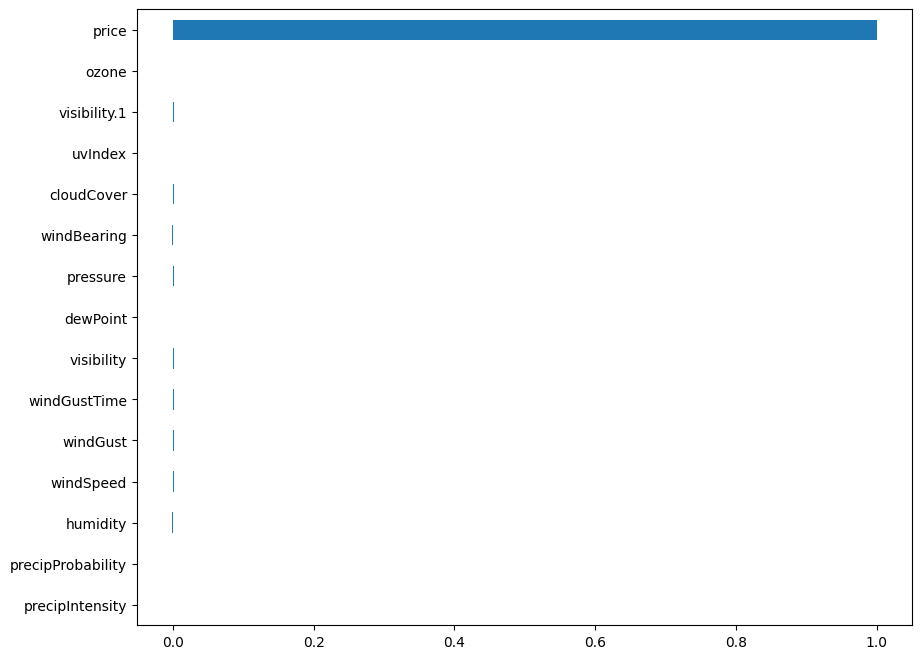

In [439]:
weather_corr = weather_df.corrwith(df['price'])

plt.figure(figsize=(10,8))
weather_corr.plot(kind='barh')
plt.ylabel="Weather related features"
plt.xlabel="Correlation"
plt.show()

In [440]:
weather_corr.round(3)

precipIntensity      0.000
precipProbability   -0.000
humidity            -0.001
windSpeed            0.001
windGust             0.001
windGustTime         0.001
visibility           0.001
dewPoint            -0.001
pressure             0.001
windBearing         -0.001
cloudCover           0.001
uvIndex             -0.000
visibility.1         0.001
ozone                0.000
price                1.000
dtype: float64

**Observations:**

All of the weather related features have very low correlation with price column.

Hence, we can drop them

In [441]:
df.drop(columns=weather_col, inplace = True)

In [442]:
df.shape

(693070, 38)

### Other Numerical Features

In [443]:
# Remaining Numerical features
rem_num_col = [x for x in num_col if x not in (datetime_col+temp_col+weather_col)]

rem_num_col

['price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'moonPhase',
 'precipIntensityMax']

In [444]:
other_col = rem_num_col[1:]

other_df = df[other_col+['price']]

In [445]:
other_df.head(3)

,distance,surge_multiplier,latitude,longitude,moonPhase,precipIntensityMax,price
0,0.44,1.0,42.2148,-71.033,0.30,0.1276,5.0
1,0.44,1.0,42.2148,-71.033,0.64,0.1300,11.0
2,0.44,1.0,42.2148,-71.033,0.68,0.1064,7.0


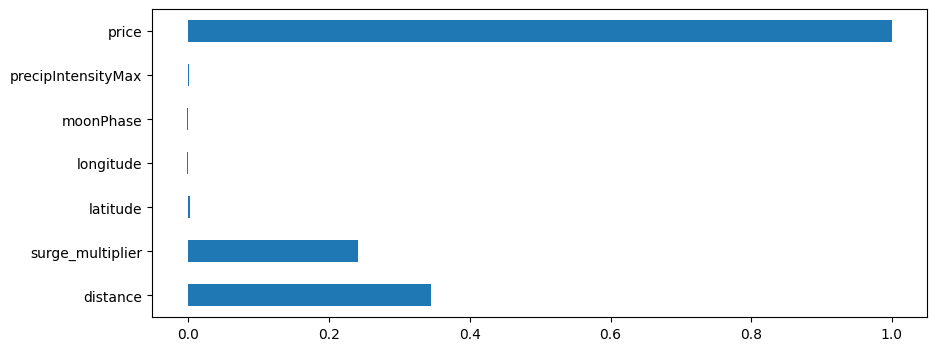

In [446]:
other_corr = other_df.corrwith(df['price'])

plt.figure(figsize=(10,4))
other_corr.plot(kind='barh')
plt.ylabel="Other features"
plt.xlabel="Correlation"
plt.show()

In [447]:
other_col

['distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'moonPhase',
 'precipIntensityMax']

**Observations:**

'distance'and 'surge_multiplier' have considerable correlation with price column. We must keep these two features.

remaining all features have very low correlation with price column, se we must drop them.

In [448]:
# dropping useless features
df.drop(columns=['latitude', 'longitude', 'moonPhase', 'precipIntensityMax'], inplace=True)

## Analysis of the clean dataset based on correlation with 'price' column

In [449]:
df.shape

(693070, 34)

In [450]:
# features after cleaning the dataset
df.columns

Index(['price', 'distance', 'surge_multiplier', 'x0_Financial District',
       'x0_North Station', 'x0_Back Bay', 'x0_Beacon Hill',
       'x0_Boston University', 'x0_Fenway', 'x0_Financial District',
       'x0_Haymarket Square', 'x0_North End', 'x0_North Station',
       'x0_Northeastern University', 'x0_South Station', 'x0_Theatre District',
       'x0_West End', 'x0_Lyft', 'x0_Uber', 'x0_Black', 'x0_Black SUV',
       'x0_Lux', 'x0_Lux Black', 'x0_Lux Black XL', 'x0_Lyft', 'x0_Lyft XL',
       'x0_Shared', 'x0_UberPool', 'x0_UberX', 'x0_UberXL', 'x0_WAV',
       'x0_ clear-night ', 'x0_ partly-cloudy-day ',
       'x0_ partly-cloudy-night '],
      dtype='object')

In [451]:
df.isna().sum()

price                         55094
distance                      55094
surge_multiplier              55094
x0_Financial District         55094
x0_North Station              55094
x0_Back Bay                    4451
x0_Beacon Hill                 4451
x0_Boston University           4451
x0_Fenway                      4451
x0_Financial District          4451
x0_Haymarket Square            4451
x0_North End                   4451
x0_North Station               4451
x0_Northeastern University     4451
x0_South Station               4451
x0_Theatre District            4451
x0_West End                    4451
x0_Lyft                         350
x0_Uber                         350
x0_Black                         31
x0_Black SUV                     31
x0_Lux                           31
x0_Lux Black                     31
x0_Lux Black XL                  31
x0_Lyft                          31
x0_Lyft XL                       31
x0_Shared                        31
x0_UberPool                 

In [458]:
df.dropna(inplace=True)

In [459]:
final_corr = df.corrwith(df['price'])

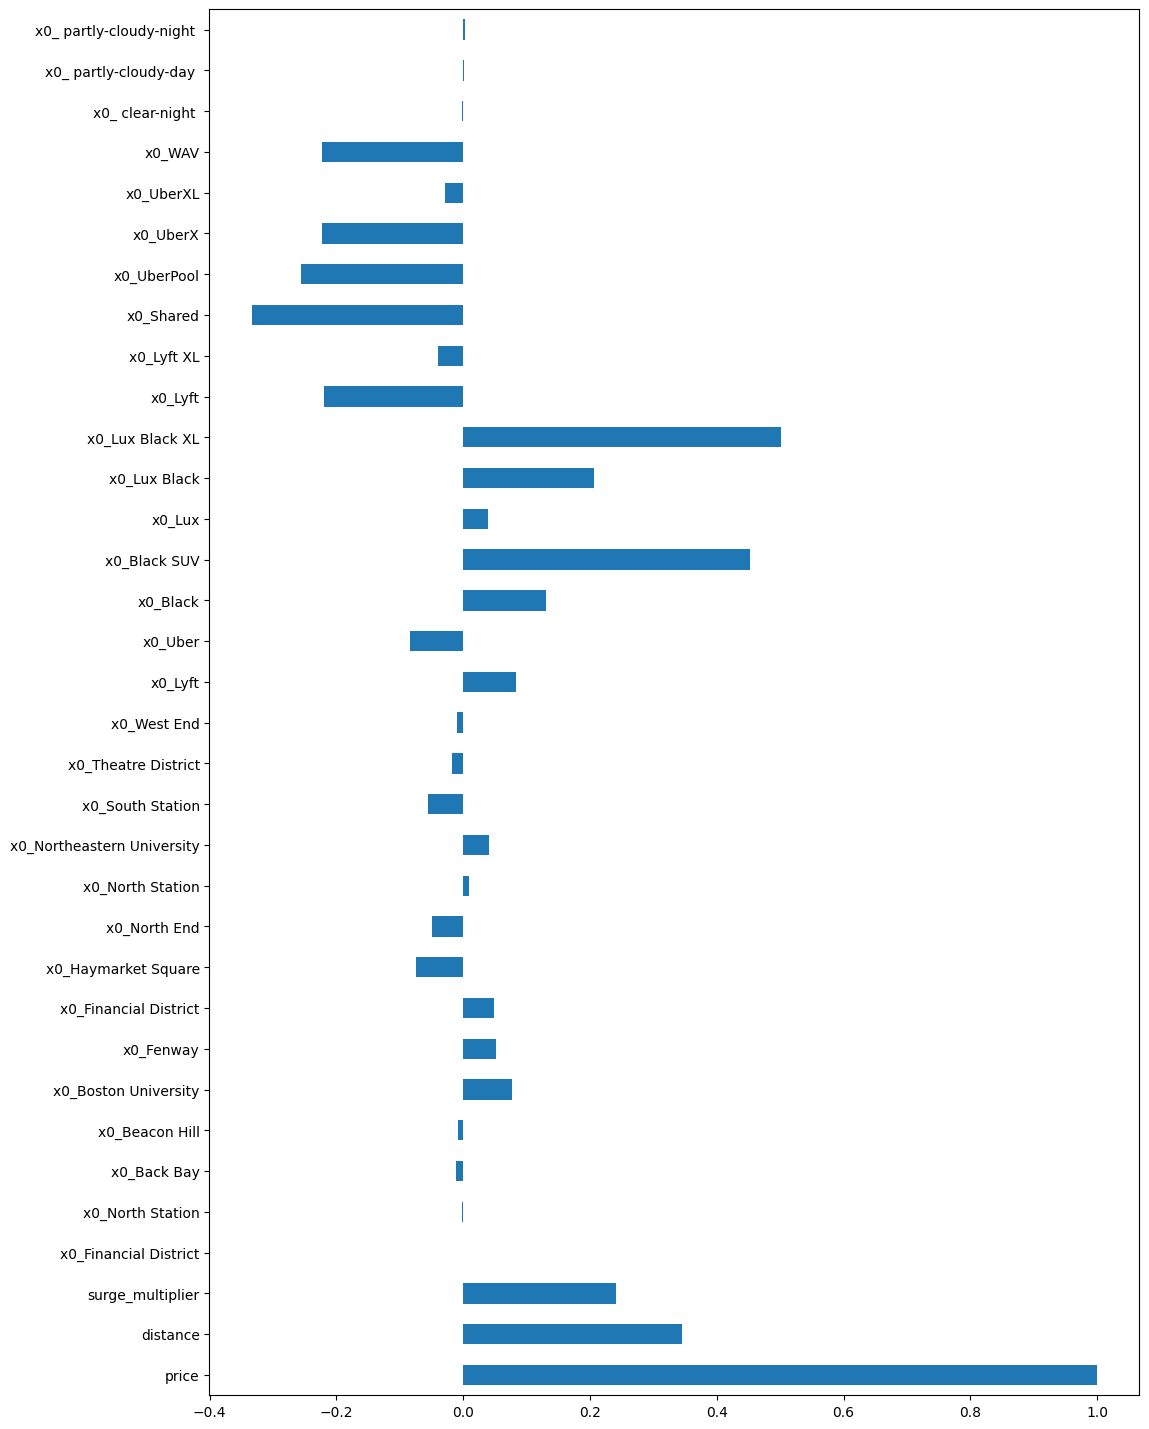

In [460]:
plt.figure(figsize=(12,18))
final_corr.plot(kind='barh')
plt.xlabel = 'Correlation'
plt.ylabel = 'Features'
plt.show()

In [479]:
# Features with correlation < 0.05
final_corr[final_corr.abs() < 0.05].index.to_list()

['x0_Financial District',
 'x0_North Station',
 'x0_Back Bay',
 'x0_Beacon Hill',
 'x0_Financial District',
 'x0_North End',
 'x0_North Station',
 'x0_Northeastern University',
 'x0_Theatre District',
 'x0_West End',
 'x0_Lux',
 'x0_Lyft XL',
 'x0_UberXL',
 'x0_ clear-night ',
 'x0_ partly-cloudy-day ',
 'x0_ partly-cloudy-night ']

**Observations:**

We can see that some of the features still have very low correlation with 'price' column.

In [480]:
# removing irrelevant columns
irr_col = final_corr[final_corr.abs() < 0.05].index.to_list()
df.drop(columns=irr_col, inplace=True)

In [482]:
df.shape

(587333, 18)

# Feature Seperation

In [481]:
X = df.drop(columns=['price'])
y = df.price

# Feature Selecttion

### Correlation heatmap

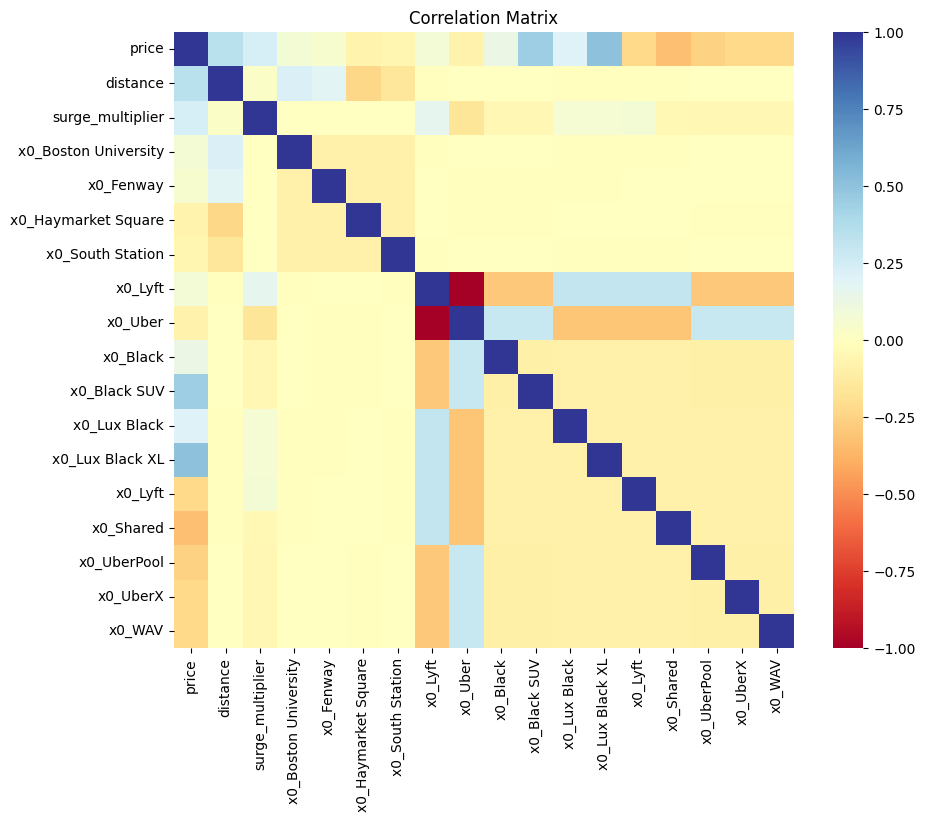

In [483]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()

In [484]:
df.columns

Index(['price', 'distance', 'surge_multiplier', 'x0_Boston University',
       'x0_Fenway', 'x0_Haymarket Square', 'x0_South Station', 'x0_Lyft',
       'x0_Uber', 'x0_Black', 'x0_Black SUV', 'x0_Lux Black',
       'x0_Lux Black XL', 'x0_Lyft', 'x0_Shared', 'x0_UberPool', 'x0_UberX',
       'x0_WAV'],
      dtype='object')

**Observations:**

'x0_Lyft' and 'x0_Uber' have very high correlation that can lead to multicolinearrity. We must drop any one of them.

In [489]:
# Removing 'x0_Lyft' feature
X.drop(columns=['x0_Lyft'], inplace=True)

c:\Users\USER\anaconda3\envs\assessment\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Multicolinearity

In [490]:
# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [491]:
vif.VIF = vif['VIF'].apply(int)
vif

,Features,VIF
0,distance,5
1,surge_multiplier,8
2,x0_Boston University,1
3,x0_Fenway,1
4,x0_Haymarket Square,1
5,x0_South Station,1
6,x0_Uber,7
7,x0_Black,1
8,x0_Black SUV,1
9,x0_Lux Black,1


# Supervised Mavhin Learning for price prediction

## Train-Test Split

In [494]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [498]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)


In [499]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled testing data
y_pred = model.predict(X_test_scaled)

## Model Evaluation

In [500]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 9.106773521415162
Root Mean Squared Error (RMSE): 3.0177431172011913
Mean Absolute Error (MAE): 2.2014514720010094
R-squared (R^2) Score: 0.8949212551408543


# Unsupervised Learning for High Booking Areas

## Data Preperation

To perform clustering using K-means, we should select the relevant numerical features that can help identify high booking areas. 

From the provided columns, the following features seem suitable for clustering:

- latitude: Latitude coordinate of the location
- longitude: Longitude coordinate of the location
- price: Price information

These features represent the geographical location and the price, which can be used to identify clusters of high booking areas based on proximity and pricing patterns.

In [529]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

In [507]:
file_path = "rideshare_kaggle.csv"
df = pd.read_csv(file_path)

In [509]:
# Select relevant features for clustering
features = ['latitude', 'longitude', 'price']

# Filter the dataset to include only the selected features
df = df[features]

# Remove rows with missing values
df = df.dropna()

In [510]:
# Standardize the feature values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

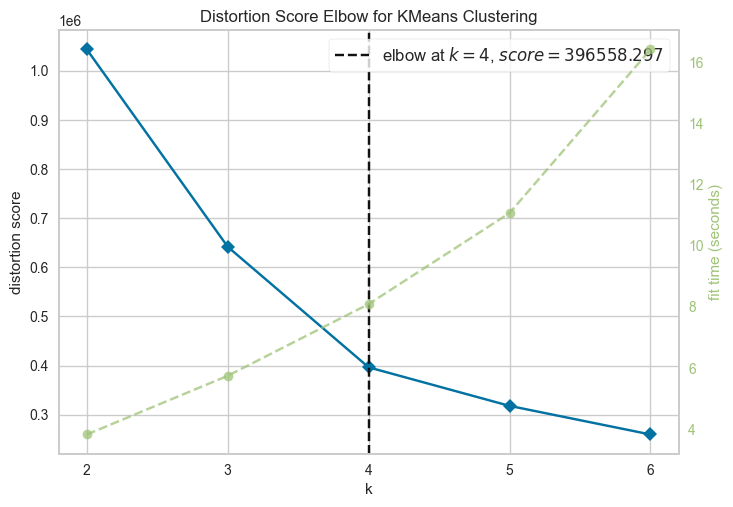

In [526]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(df_scaled)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

In [535]:
# Based on the elbow curve, choose the optimal number of clusters
k = 4  

In [536]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=k, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='auto')
kmeans.fit(df_scaled)

# Add cluster labels to the dataset
df['cluster_label'] = kmeans.labels_

In [537]:
set(kmeans.labels_)

{0, 1, 2, 3}

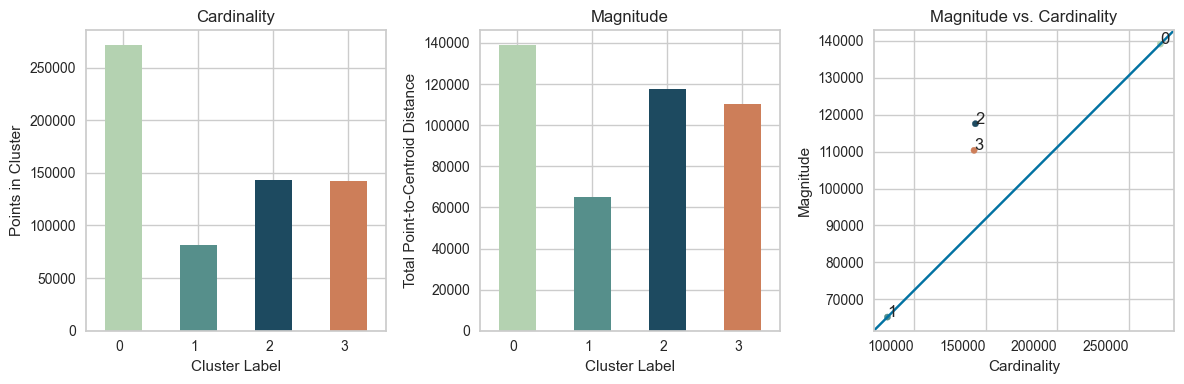

In [538]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(kmeans.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(df_scaled,
                       kmeans.labels_,
                       kmeans.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(df_scaled,
                              kmeans.labels_,
                              kmeans.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:kmeans.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

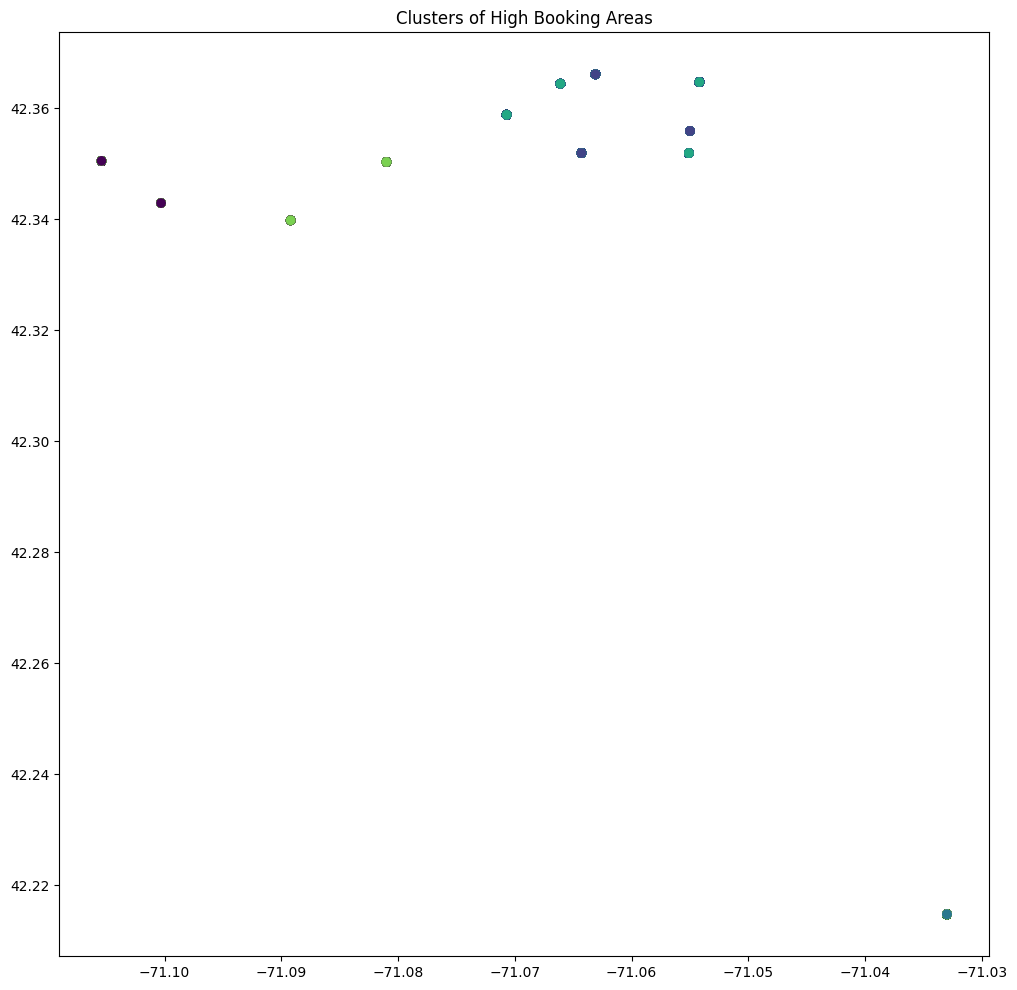

In [523]:
# Visualizing pca and pacmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4), dpi=200)

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(df_scaled)

for l, c, m in zip(range(0, 3), cluster_colors[0:kmeans.n_clusters], ('^', 's', 'o')):
    ax1.scatter(X_std_pca[y == l, 0],
                X_std_pca[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

# PACMAP
embedding = pacmap.PaCMAP(random_state=42)
X_std_pacmap = embedding.fit_transform(df_scaled.to_numpy())

for l, c, m in zip(range(0, 3), cluster_colors[0:kmeans.n_clusters], ('^', 's', 'o')):
    ax2.scatter(X_std_pacmap[y == l, 0],
                X_std_pacmap[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )
    
ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(kmeans.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")